# Network Analysis of Game of Thrones Characters (Season 3)

Data source: https://github.com/mathbeveridge/gameofthrones#gameofthrones

In [2]:
import networkx as nx
from matplotlib.pyplot import figure
import pandas as pd

In [7]:
#Loading the datasets
edges = pd.read_csv('got-s3-edges.csv')
nodes = pd.read_csv('got-s3-nodes.csv')

In [33]:
edges.head(10)

,Source,Target,Weight,Season
0,JON,YGRITTE,159,3
1,BRIENNE,JAIME,127,3
2,TYRION,TYWIN,115,3
3,RAMSAY,THEON,114,3
4,CERSEI,TYRION,95,3
5,GILLY,SAM,95,3
6,ROBB,TALISA,89,3
7,SANSA,TYRION,85,3
8,ARYA,HOUND,79,3
9,DAVOS,STANNIS,77,3


In [94]:
edges['Weight'].describe()

count    504.000000
mean      11.867063
std       19.024944
min        2.000000
25%        2.000000
50%        4.000000
75%       12.000000
max      159.000000
Name: Weight, dtype: float64

In [9]:
nodes

,Id,Label
0,AEGON,Aegon
1,AERYS,Aerys
2,ANGUY,Anguy
3,ARYA,Arya
4,LITTLE_SAM,Little Sam
...,...,...
120,VIOLET,Violet
121,WALDER,Walder
122,WILLEM_LANNISTER,Willem
123,YARA,Yara


In [25]:
G = nx.from_pandas_edgelist(edges, "Source", "Target", create_using=nx.Graph(), edge_attr="Weight")

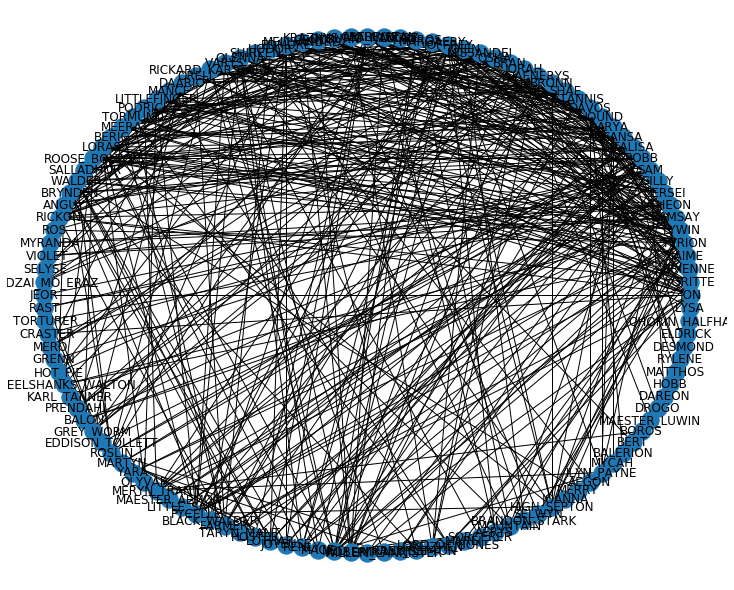

In [81]:
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [29]:
len(G.nodes)

124

In [68]:
len(G.edges)

504

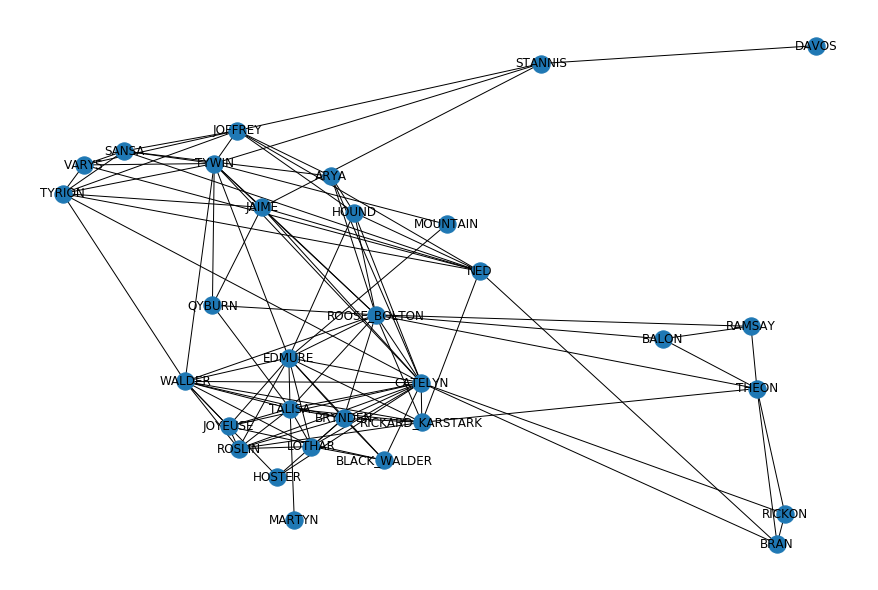

In [103]:
figure(figsize=(12, 8))
G_robb = G.subgraph(nodes=list(G.neighbors("ROBB")))
nx.draw(G_robb, with_labels=True, pos=nx.spring_layout(G))

We analyze the starks since they play an important role especially this season with the 'War of the five kings' and the 'Red Wedding'

In [65]:
nodes_stark = ['NED', 'BRANDON', 'CATELYN', 'SANSE', 'ARYA', 'RICKON', 'ROBB', 'BRAN', 'JON', 'THEON']

In [60]:
'BRAN' in list(edges['Source'])

True

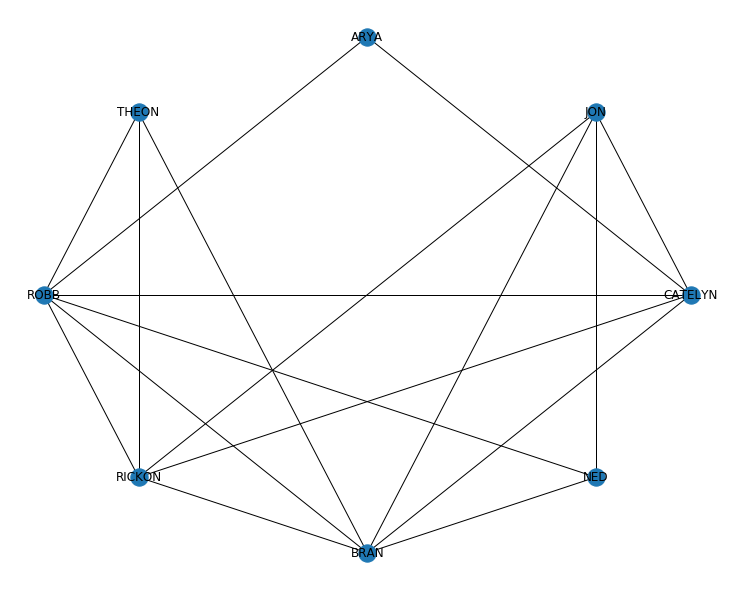

In [105]:
figure(figsize=(10, 8))
G_sub = G.subgraph(nodes=nodes_stark)
nx.draw_shell(G_sub, with_labels=True, edge_labels = 'Weight')

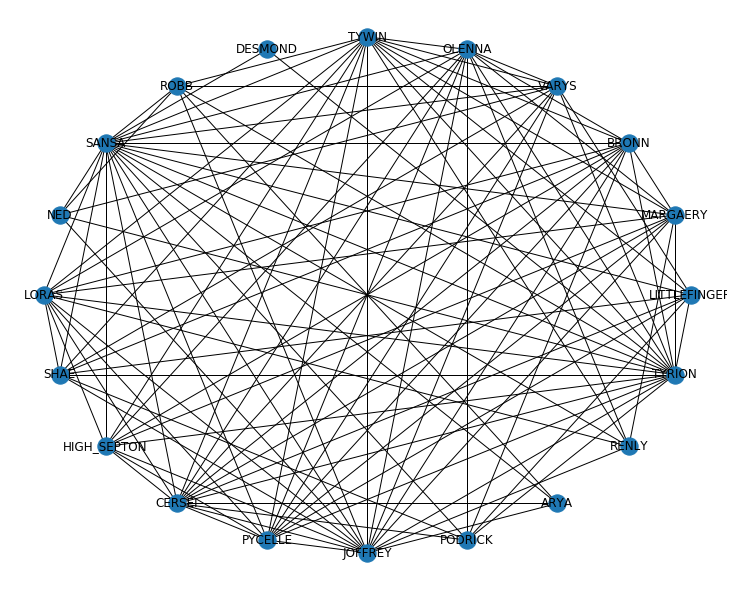

In [107]:
figure(figsize=(10, 8))
G_sansa = G.subgraph(nodes=list(G.neighbors(n="SANSA")) + ["SANSA"])
nx.draw_shell(G_sansa, with_labels=True)

## **Path**

Path - list of nodes and edges that are to be traveresed when moving from one node to another

Simple Path - path with no repeated nodes

In [108]:
G_sansa

## Shortest path - shortest of all the simple paths (shortest in terms of number of edges)

In [110]:
list(nx.shortest_path(G_sansa, source="SANSA", target="ARYA"))

['SANSA', 'ARYA']

In [111]:
nx.shortest_path_length(G_sansa, source="SANSA", target="ARYA") # number of edges

1

# **Node importance** (Influencers)

Measures the rank or quantifies the influence of every node within a graph [1]

1. Ranking Webpages in a Search
2. Targeting for Ads
3. Widespread of a campaign


In [112]:
result = nx.degree_centrality(G_sansa)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [116]:
sorted_d

[('SANSA', 1.0),
 ('TYRION', 0.894736842105263),
 ('JOFFREY', 0.8421052631578947),
 ('TYWIN', 0.7894736842105263),
 ('CERSEI', 0.7368421052631579),
 ('OLENNA', 0.6842105263157894),
 ('BRONN', 0.631578947368421),
 ('LORAS', 0.631578947368421),
 ('PYCELLE', 0.631578947368421),
 ('MARGAERY', 0.5789473684210527),
 ('VARYS', 0.5789473684210527),
 ('HIGH_SEPTON', 0.5263157894736842),
 ('SHAE', 0.47368421052631576),
 ('LITTLEFINGER', 0.42105263157894735),
 ('ROBB', 0.3684210526315789),
 ('PODRICK', 0.3684210526315789),
 ('RENLY', 0.3157894736842105),
 ('NED', 0.2631578947368421),
 ('ARYA', 0.21052631578947367),
 ('DESMOND', 0.10526315789473684)]

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y_pos, performance, xerr=error, align='center')
#Make a horizontal bar chart here

In [117]:
result = nx.betweenness_centrality(G_sansa)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [118]:
sorted_d

[('SANSA', 0.15829388285528634),
 ('TYRION', 0.09835236238745011),
 ('JOFFREY', 0.06888981713543117),
 ('CERSEI', 0.03795600111389585),
 ('TYWIN', 0.0374779541446208),
 ('OLENNA', 0.01946532999164578),
 ('VARYS', 0.01869488536155203),
 ('LORAS', 0.010396361273554254),
 ('BRONN', 0.010159658405272439),
 ('PYCELLE', 0.00895293790030632),
 ('SHAE', 0.007866889445836814),
 ('ROBB', 0.007504873294346978),
 ('MARGAERY', 0.004873294346978557),
 ('LITTLEFINGER', 0.004165506358488814),
 ('PODRICK', 0.0030516105077508585),
 ('ARYA', 0.0009746588693957114),
 ('DESMOND', 0.0),
 ('NED', 0.0),
 ('HIGH_SEPTON', 0.0),
 ('RENLY', 0.0)]

In [119]:
result = nx.closeness_centrality(G_sansa)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [120]:
sorted_d

[('SANSA', 1.0),
 ('TYRION', 0.9047619047619048),
 ('JOFFREY', 0.8636363636363636),
 ('TYWIN', 0.8260869565217391),
 ('CERSEI', 0.7916666666666666),
 ('OLENNA', 0.76),
 ('BRONN', 0.7307692307692307),
 ('LORAS', 0.7307692307692307),
 ('PYCELLE', 0.7307692307692307),
 ('MARGAERY', 0.7037037037037037),
 ('VARYS', 0.7037037037037037),
 ('HIGH_SEPTON', 0.6785714285714286),
 ('SHAE', 0.6551724137931034),
 ('LITTLEFINGER', 0.6333333333333333),
 ('ROBB', 0.6129032258064516),
 ('PODRICK', 0.6129032258064516),
 ('RENLY', 0.59375),
 ('NED', 0.5757575757575758),
 ('ARYA', 0.5588235294117647),
 ('DESMOND', 0.5277777777777778)]

In [121]:
result = nx.pagerank(G_sansa)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [122]:
sorted_d

[('SANSA', 0.08837082485854575),
 ('TYRION', 0.07895285261443767),
 ('JOFFREY', 0.073390760651399),
 ('TYWIN', 0.06786254995843304),
 ('CERSEI', 0.06417679479144466),
 ('OLENNA', 0.05933511926946937),
 ('LORAS', 0.05508049081143698),
 ('BRONN', 0.055001734268795954),
 ('PYCELLE', 0.054848720726745376),
 ('VARYS', 0.05232689310704128),
 ('MARGAERY', 0.050939754014808325),
 ('HIGH_SEPTON', 0.04654046769520763),
 ('SHAE', 0.04347583977509656),
 ('LITTLEFINGER', 0.03947305349301947),
 ('ROBB', 0.03696471117650668),
 ('PODRICK', 0.035373212287184846),
 ('RENLY', 0.03091528437429355),
 ('NED', 0.027832211884643195),
 ('ARYA', 0.02373752303485307),
 ('DESMOND', 0.015401201206637672)]